## Importing our Libraries

In [201]:
import tweepy
import pandas as pd
import os
import json
import matplotlib.pyplot as plt
import requests

## Gather Data
##### API file from twitter
##### Enchanced Archive Data.csv
##### Image_predictions. tsv file

### Importing API file

In [202]:
consumer_key = 'IwC8KRDLz1yK0ABV12HtRdUXS'
consumer_secret = 'HN9q0JG7Ax0YPb9TMuB622gUr8qCtFY3bgCjY5HSIlzS7FpyP8'
access_token = '197586815-rqftByFMCIA2bHLDwz2SyDnDrsKbjyrzVd8j6svy'
access_secret = 'Qt22VQllvtKhk6u2AdMQ1linzyT3UYBHYTcbnFYrekE2e'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [203]:
archive_df = pd.read_csv('C:/Users/EGYPT/data analysis/twitter-archive-enhanced.csv') 
exp_tweet = api.get_status(archive_df.tweet_id[1000], tweet_mode = 'extended')
content = exp_tweet._json
content

{'created_at': 'Wed Jun 29 01:23:16 +0000 2016',
 'id': 747963614829678593,
 'id_str': '747963614829678593',
 'full_text': 'PUPPER NOOOOO BEHIND YOUUU 10/10 pls keep this pupper in your thoughts https://t.co/ZPfeRtOX0Q',
 'truncated': False,
 'display_text_range': [0, 70],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 747963600220917761,
    'id_str': '747963600220917761',
    'indices': [71, 94],
    'media_url': 'http://pbs.twimg.com/media/CmFM7ngXEAEitfh.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/CmFM7ngXEAEitfh.jpg',
    'url': 'https://t.co/ZPfeRtOX0Q',
    'display_url': 'pic.twitter.com/ZPfeRtOX0Q',
    'expanded_url': 'https://twitter.com/dog_rates/status/747963614829678593/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'medium': {'w': 937, 'h': 632, 'resize': 'fit'},
     'small': {'w': 680, 'h': 459, 'resize': 'fit'},
     'large': {'w': 937, 'h': 632, '

In [204]:
errors = []
if not os.path.isfile('tweet_json.txt'):
    with open('tweet_json.txt','w') as file:
        for tweet_id in archive_df['tweet_id']:
            try:
                status = api.get_status(tweet_id, wait_on_rate_limit = True, wait_on_rate_limit_notify = True, tweet_mode='extended' )
                json.dump(status._json, file)
                file.write('\n')
            except Exception as e:
                    print("Error on tweet id {}".format(tweet_id) + ";" + str(e))
                    errors.append(tweet_id)

In [205]:
df_list = []
with open ('tweet_json.txt','r') as file:
    for line in file:
        
        tweet = json.loads(line)
        
        df_list.append(tweet)
      
    
df_list[:2]  

[{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
  'id': 892420643555336193,
  'id_str': '892420643555336193',
  'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
  'truncated': False,
  'display_text_range': [0, 85],
  'entities': {'hashtags': [],
   'symbols': [],
   'user_mentions': [],
   'urls': [],
   'media': [{'id': 892420639486877696,
     'id_str': '892420639486877696',
     'indices': [86, 109],
     'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
     'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
     'url': 'https://t.co/MgUWQ76dJU',
     'display_url': 'pic.twitter.com/MgUWQ76dJU',
     'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
     'type': 'photo',
     'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
      'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
      'small': {'w': 540, 'h': 528, 'resize': 'fit'}

In [206]:
api_df = pd.DataFrame(df_list, columns = ([ 'id_str' , 'retweet_count' , 'favorite_count']))

In [207]:
api_df.head()

,id_str,retweet_count,favorite_count
0,892420643555336193,7489,35460
1,892177421306343426,5557,30696
2,891815181378084864,3681,23089
3,891689557279858688,7666,38750
4,891327558926688256,8267,37031


### Encahnced Archive Data. CSV


In [208]:
archive_df = pd.read_csv('C:/Users/EGYPT/data analysis/twitter-archive-enhanced.csv')

In [209]:
archive_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### Image_predictions.tsv file

In [210]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

In [211]:
response = requests.get(url)

In [212]:
if not os.path.isfile('image_predicitons.tsv'):
    with open('image_predictions.tsv', 'wb') as file:
        file.write(response.content)

In [213]:
image_df = pd.read_csv('C:/Users/EGYPT/image_predictions.tsv', sep = ('\t'))

In [214]:
image_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## Assess Data.

### API file


#### Programmatic Assessment

In [215]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
id_str            2331 non-null object
retweet_count     2331 non-null int64
favorite_count    2331 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.7+ KB


In [216]:
api_df.sample(5)

,id_str,retweet_count,favorite_count
722,780543529827336192,1737,6270
381,825120256414846976,1236,0
476,813217897535406080,7255,18605
1293,706593038911545345,612,2104
1085,733828123016450049,756,3482


In [217]:
api_df.shape

(2331, 3)

In [218]:
sum(api_df.id_str.duplicated())

0

### Issues Found for API file 

#### 1 Tidiness issue.

* *Changing Column name form id_str to tweet_id*

### Assess
## Encahnced Twitter Data. csv

#### Visual Assessment


* **Used Excel to Explore Data**

#### Programmatic Assessment


In [219]:
archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [220]:
archive_df.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [221]:
archive_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
205,852912242202992640,NaN,NaN,2017-04-14 15:51:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Benny. He likes being adorable and making...,NaN,NaN,NaN,"https://www.gofundme.com/bennys-medical-bills,...",12,10,Benny,None,None,None,None
1272,709225125749587968,NaN,NaN,2016-03-14 03:50:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Walker. He's a Butternut Khalifa. Appe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/709225125...,11,10,Walker,None,None,None,None
316,834931633769889797,NaN,NaN,2017-02-24 01:03:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tucker. He decided it was time to part...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/834931633...,12,10,Tucker,None,None,None,None
440,819924195358416896,NaN,NaN,2017-01-13 15:08:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a doggo who has messed up. He was...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/819924195...,11,10,None,doggo,None,None,None
1584,687096057537363968,NaN,NaN,2016-01-13 02:17:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pupper's New Year's resolution was to bec...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687096057...,11,10,None,None,None,pupper,None


In [222]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [223]:
sum(archive_df.tweet_id.duplicated())

0

In [224]:
archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [225]:
archive_df.shape

(2356, 17)

### Issues found for

#### 7 Quality issues

* *Changing tweet_id from int to string*
* *Changing timestamp from object to datetime*
* *Dropping (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id,     retweeted_status_timestamp)* 
* *removing tweets that don't contain images.*
* *Dropping the tweet that contains snopp dog image not a real dog*
* *A lot of worng names and missing data*
* *some values in the rating_denominator column is above and less 10*
* *some values in the rating_numerator column is above 100*

#### 2 Tidiness issues
* *removing +0000 in timestamp column*
* *split time stamp into to new columns date and time* 

## Image_prediction

#### Programmatic Assessment


In [226]:
image_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [227]:
image_df.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [228]:
image_df.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
53,667012601033924608,https://pbs.twimg.com/media/CUG0bC0U8AAw2su.jpg,1,hyena,0.987230,False,African_hunting_dog,0.012601,False,coyote,0.000057,False
232,670417414769758208,https://pbs.twimg.com/media/CU3NE8EWUAEVdPD.jpg,1,sea_urchin,0.493257,False,porcupine,0.460565,False,cardoon,0.008146,False
213,670040295598354432,https://pbs.twimg.com/media/CUx2F6lVEAAvFev.jpg,1,web_site,0.901552,False,borzoi,0.026660,True,Chihuahua,0.012438,True
1628,804738756058218496,https://pbs.twimg.com/media/CysBn-lWIAAoRx1.jpg,1,Tibetan_mastiff,0.915790,True,German_shepherd,0.062480,True,Leonberg,0.008297,True
1066,715696743237730304,https://pbs.twimg.com/media/Ce6qZC2WAAAcSoI.jpg,1,Staffordshire_bullterrier,0.427836,True,pug,0.221409,True,French_bulldog,0.132135,True


In [229]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [230]:
image_df.shape

(2075, 12)

### Issues Found

#### َ2 Quality issues
* *Changing tweet_id from int to str*
* *Droping Breeds with false as it means it is not well predicted*


#### 1 Tidiness issue
* *Column headers are values, not variable names.*


# Cleaning Data

### API file
* *Changing Column name form id_str to tweet_id*

### Define

In [231]:
api_df_copy = api_df.copy()

### Code

In [232]:
api_df_copy = api_df_copy.rename(columns = {"id_str":"tweet_id"})

### Test

In [233]:
api_df_copy.head()


,tweet_id,retweet_count,favorite_count
0,892420643555336193,7489,35460
1,892177421306343426,5557,30696
2,891815181378084864,3681,23089
3,891689557279858688,7666,38750
4,891327558926688256,8267,37031


### Enchanced Twitter Data

#### 7 Quality issues

* *Changing tweet_id from int to string*
* *Changing timestamp from object to datetime*
* *Dropping (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id,     retweeted_status_timestamp)* 
* *removing tweets that don't contain images.*
* *Dropping the tweet that contains snopp dog image not a real dog*
* *A lot of worng names and missing data*
* *some values in the rating_denominator column are above and less 10*


#### 2 Tidiness issues
* *removing +0000 in timestamp column*
* *split time stamp into to new columns date and time* 

### Define

* *Changing tweet_id from int to string*

In [234]:
archive_df_copy = archive_df.copy()

### Code

In [235]:
archive_df_copy.tweet_id = archive_df_copy.tweet_id.astype('str')

### Test

In [236]:
archive_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), o

### Define

* *removing +0000 in timestamp column*
* *Changing timestamp from object to datetime*
* *split time stamp into to new columns date and time* 

### Code

In [237]:
archive_df_copy.timestamp = archive_df_copy.timestamp.str.slice(stop = -5)

In [238]:
archive_df_copy.timestamp =  pd.to_datetime(archive_df_copy['timestamp'])

In [239]:
archive_df_copy['date'] = [d.date() for d in archive_df_copy['timestamp']]
archive_df_copy['time'] = [d.time() for d in archive_df_copy['timestamp']]

In [240]:
archive_df_copy.drop(columns = ['timestamp'],inplace = True)

### Test

In [241]:
archive_df_copy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time
0,892420643555336193,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,2017-08-01,16:23:56
1,892177421306343426,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,2017-08-01,00:17:27
2,891815181378084864,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,2017-07-31,00:18:03
3,891689557279858688,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,2017-07-30,15:58:51
4,891327558926688256,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,2017-07-29,16:00:24


### Define
* *Dropping (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)*

### Code

In [242]:
archive_df_copy.drop(columns = ['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp'], inplace = True)

### Test

In [243]:
archive_df_copy.head()

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,2017-08-01,16:23:56
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,2017-08-01,00:17:27
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,2017-07-31,00:18:03
3,891689557279858688,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,2017-07-30,15:58:51
4,891327558926688256,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,2017-07-29,16:00:24


### Define
* *Checking for null values in expanded_urls to remove tweets that don't contain images*.

### Code

In [244]:
sum(archive_df_copy.expanded_urls.isnull())

59

In [245]:
archive_df_copy.dropna(subset=['expanded_urls'],inplace = True)

### Test

In [246]:
sum(archive_df_copy.expanded_urls.isnull())

0

### Define
* *After checking row 2074 with ID: 670842764863651840 I realized it was a photo for snop dog not a real dog so, I dropped it.*

### Code

In [247]:
archive_df_copy.drop([2074], inplace = True)

### Test

In [248]:
archive_df_copy[archive_df_copy.tweet_id ==  670842764863651840]

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time


### Define
* *Dropping the last four columns doggo, floofer, pupper, puppo.*

### Code

In [249]:
archive_df_copy.drop(columns = {'doggo','floofer','pupper','puppo'}, inplace = True)

### Test

In [250]:
archive_df_copy.shape

(2296, 9)

### Define
* *A lot of worng names and missing data*

### Code


In [251]:
archive_df_copy.drop(columns = ['name'], inplace=True)

### Test

In [252]:
archive_df_copy.shape

(2296, 8)

### Define
* *some values in the rating_denominator column are above and less 10*


### Code


In [253]:
archive_df_copy[archive_df_copy.rating_denominator > 10].head()


,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,date,time
433,820690176645140481,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,84,70,2017-01-15,17:52:40
784,775096608509886464,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",https://twitter.com/dog_rates/status/740373189...,9,11,2016-09-11,22:20:06
902,758467244762497024,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,165,150,2016-07-28,01:00:57
1068,740373189193256964,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,9,11,2016-06-08,02:41:38
1120,731156023742988288,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,https://twitter.com/dog_rates/status/731156023...,204,170,2016-05-13,16:15:54


In [254]:
for i in archive_df_copy.rating_denominator:
    if i > 10:
        archive_df_copy.rating_denominator.replace(i,10,inplace = True)

### Test

In [255]:
archive_df_copy[archive_df_copy.rating_denominator > 10]

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,date,time


### Code

In [256]:
archive_df_copy[archive_df_copy.rating_denominator < 10].head()

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,date,time
516,810984652412424192,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24,7,2016-12-19,23:06:23
2335,666287406224695296,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,https://twitter.com/dog_rates/status/666287406...,1,2,2015-11-16,16:11:11


In [257]:
archive_df_copy.rating_denominator.replace([7,2],10, inplace=True)

### Test

In [258]:
archive_df_copy[archive_df_copy.rating_denominator < 10].head()

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,date,time


In [259]:
archive_df_copy.shape

(2296, 8)

## Image_prediction.tsv

### Define
* *Changing tweet_id from int to str*
* *Column headers are values, not variable names.*
* *Dropping Breeds with False as it means it is not well predicted*

### Code

In [260]:
image_df_copy = image_df.copy()

In [261]:
image_df_copy.tweet_id = image_df_copy.tweet_id.astype(str)

### Test

In [262]:
image_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [263]:
image_df_copy.shape

(2075, 12)

### Code

In [264]:
# Renaming the dataset columns
cols = ['tweet_id', 'jpg_url', 'img_num', 
       'prediction_1', 'confidence_1', 'breed_1',
       'prediction_2', 'confidence_2', 'breed_2',
       'prediction_3', 'confidence_3', 'breed_3']
image_df_copy.columns = cols

# Reshaping the dataframe
test = pd.wide_to_long(image_df_copy, stubnames=['prediction', 'confidence', 'breed'], 
    i=['tweet_id', 'jpg_url', 'img_num'], j='prediction_level', sep="_").reset_index()

### Test

In [265]:
image_df = test

image_df.head()

,tweet_id,jpg_url,img_num,prediction_level,prediction,confidence,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,Welsh_springer_spaniel,0.465074,True
1,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,2,collie,0.156665,True
2,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,3,Shetland_sheepdog,0.061428,True
3,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,1,redbone,0.506826,True
4,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,2,miniature_pinscher,0.074192,True


### Code

In [266]:
index = image_df[(image_df.breed == False)].index
image_df.drop(index,inplace = True)

### Test

In [267]:
image_df[(image_df.breed == False)]

,tweet_id,jpg_url,img_num,prediction_level,prediction,confidence,breed


### Merging two datas together api_df_copy and archive_df_copy in one df called: wrangle_df


In [268]:
wrangle_df = pd.merge(left = api_df_copy, right = archive_df_copy)

In [269]:
wrangle_df.head()

,tweet_id,retweet_count,favorite_count,source,text,expanded_urls,rating_numerator,rating_denominator,date,time
0,892420643555336193,7489,35460,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,2017-08-01,16:23:56
1,892177421306343426,5557,30696,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,2017-08-01,00:17:27
2,891815181378084864,3681,23089,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,2017-07-31,00:18:03
3,891689557279858688,7666,38750,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,2017-07-30,15:58:51
4,891327558926688256,8267,37031,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,2017-07-29,16:00:24


### Checking for duplicated tweet_id and shape of the data

In [270]:
sum(wrangle_df.tweet_id.duplicated())

0

In [271]:
wrangle_df.shape

(2271, 10)

### Now we have two datasets one called Wrangle_df and one called Image_prediciton.

# Viusalziation for both data

### Wrangle_df

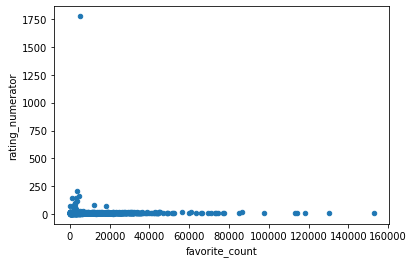

In [272]:
wrangle_df.plot(x='favorite_count',y='rating_numerator',kind='scatter')

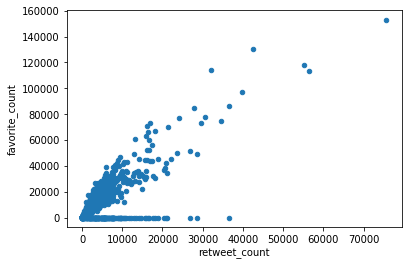

In [273]:
wrangle_df.plot(x='retweet_count',y='favorite_count',kind='scatter')

### Image_prediciton 

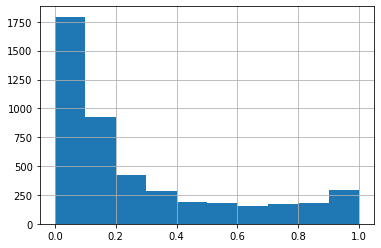

In [281]:
x = image_df.confidence.hist()


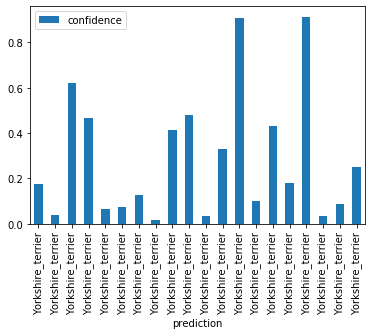

In [313]:
image_df[image_df.prediction == 'Yorkshire_terrier'].plot(x='prediction',y='confidence',kind='bar')



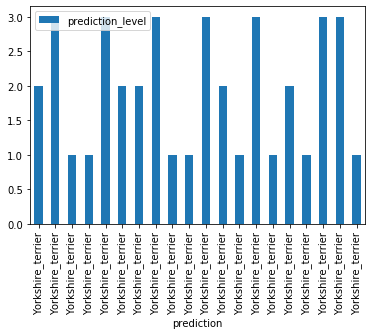

In [311]:
image_df[image_df.prediction == 'Yorkshire_terrier'].plot(x='prediction',y='prediction_level',kind='bar')

In [287]:
Image_predictions = image_df.to_csv('Image_predictions.csv') 

In [288]:
twitter_master = wrangle_df.to_csv('twitter_master.csv')